<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/MultiOutputRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('gdrive')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

#dataset
file = '/content/gdrive/MyDrive/data/data_2020_1_12.CSV'
data = pd.read_csv(file)

data['도착영업소코드'] = data['도착영업소코드'].map({105:20, 110:77, 115:135, 120:185, 125:240, 130:215, 135:339,140:407})
data.rename(columns = {'도착영업소코드': '거리'}, inplace=True)
data_destination = data[data['거리'].isin([135,407])]
data_time = data_destination.groupby(by=['집계시','요일','거리'])['통행시간'].mean()
data_a = data_time.unstack(level=-1)
data_out = data_a.reset_index()
list = data_out.values.tolist()

In [ ]:
#train data set
xtrain = [r[:2] for r in list]
ytrain = [r[2:] for r in list]
xtrain

In [ ]:
#using tesorflow
learning_rate = 1e-4
iteration = 5000
sgd = tf.keras.optimizers.SGD(learning_rate = learning_rate)
mse = tf.keras.losses.mean_squared_error
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, input_shape=(2,)))
model.compile(optimizer = sgd, loss = mse)
history = model.fit(xtrain, ytrain, epochs=iteration)

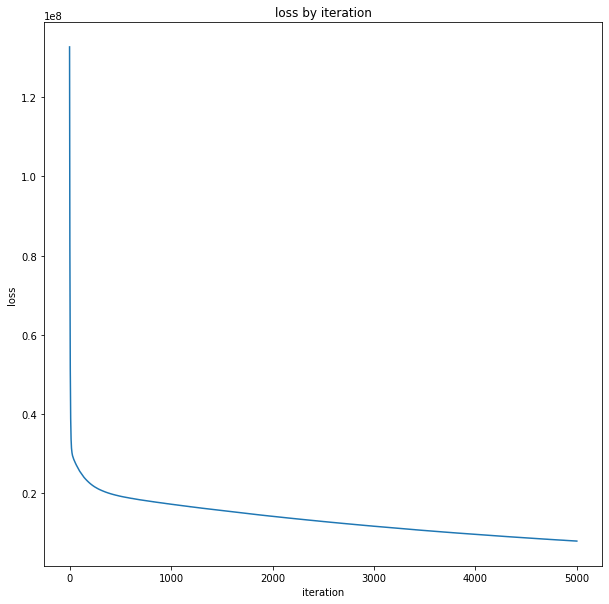

In [18]:
plt.figure(figsize =(10,10))
plt.plot(history.history['loss'])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss by iteration')
plt.show()

In [ ]:
print("%20s %20s" %('step' , 'cost') + '\n')
for step in range(iteration):
  if step%100 == 0:
    cost_val = history.history['loss'][step]
    print("%20i %20.5f" %(step,cost_val))

In [22]:
Time = 14 #@param {type :"slider", min:0, max:23, step:1}
Day = 3 #@param {type :"slider", min:0, max:14, step:1}

time_cond = data_out['집계시'] == Time
day_cond = data_out['요일'] == Day
selected_data =data_out[time_cond & day_cond]

              거리(km)            실제                 예측                    차이

                 135          6077.381503          5531.895020                  545

                 407         15936.189655         15328.570312                  607



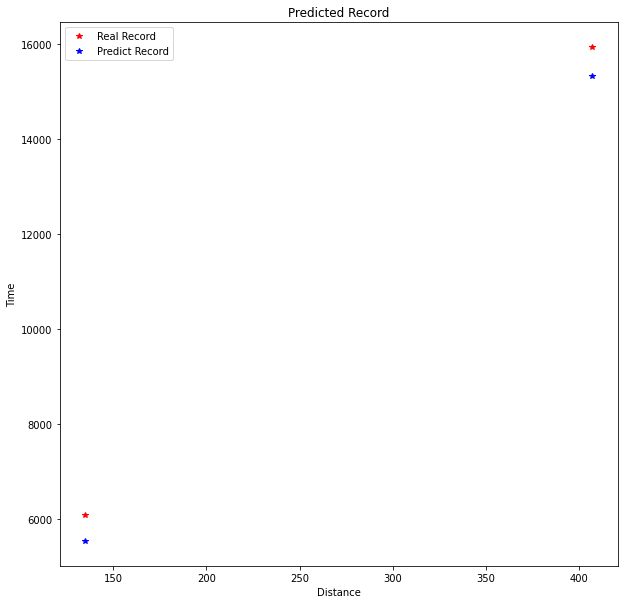

In [50]:
input = [Time, Day]
time = model.predict([input])
distance= [ 135, 407]


plt.figure(figsize=(10,10))
pxdata, pydata = [],[]
rydata = selected_data[135], selected_data[407]
print("%20s %13s %18s %21s" %('거리(km)','실제','예측','차이')+'\n')

for index in range(len(time[0])):
  dist_time = time[0][index]
  real_time = rydata[index]
  variation = real_time - dist_time
  pxdata.append(distance[index])
  pydata.append(dist_time)
  print("%20d %20f %20f %20i" % (distance[index], real_time, dist_time, variation)+'\n')

plt.plot(pxdata, rydata, 'r*', label='Real Record')
plt.plot(pxdata, pydata, 'b*', label='Predict Record')
plt.title('Predicted Record')
plt.xlabel('Distance')
plt.ylabel('Time')
plt.legend()
plt.show()